## Using Pre-trained Word Embeddings - GLOVE and WORD2VEC

## GLOVE pre-trained word embeddings:

In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# /content/Spam Email raw text for NLP.csv
dataset = pd.read_csv('/content/Spam Email raw text for NLP.csv')

In [3]:
dataset.head()

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6


In [4]:
dataset['MESSAGE'] = dataset['MESSAGE'].apply(lambda x : x.lower())
dataset['MESSAGE'] = dataset['MESSAGE'].apply((lambda x : re.sub('[^a-zA-z0-9\s]', '' , x)))
dataset['MESSAGE'] = dataset['MESSAGE'].replace(r'\s+|\\n', ' ', regex=True)

In [5]:
dataset['Number of msg_words'] = dataset['MESSAGE'].apply(lambda x: len(x.split()))

In [6]:
dataset.head()

,CATEGORY,MESSAGE,FILE_NAME,Number of msg_words
0,1,dear homeowner interest rates are at their low...,00249.5f45607c1bffe89f60ba1ec9f878039a,81
1,1,attention this is a must for all computer user...,00373.ebe8670ac56b04125c25100a36ab0510,151
2,1,this is a multipart message in mime format _ne...,00214.1367039e50dc6b7adb0f2aa8aba83216,465
3,1,important information the new domain names are...,00210.050ffd105bd4e006771ee63cabc59978,154
4,1,this is the bottom line if you can give away c...,00033.9babb58d9298daa2963d4f514193d7d6,302


In [7]:
dataset = dataset.sample(frac=1)

X = dataset['MESSAGE'].values
y = dataset['CATEGORY'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [8]:
print("Classes:", np.unique(y_train))
print("Number of samples in train:", len(X_train))
print(X_train[0])

Classes: [0 1]
Number of samples in train: 4057
key concepts microbes methane black sea big mike the viridian bug attention conservation notice continues the viridian obsession with ecologically active microorganisms links gm to give away thousands of electric vehicles usa httpwwwplanetarkorgdailynewsstorycfmnewsid17318storyhtm sinking pacific states slam us over sea levels fiji httpwwwplanetarkorgdailynewsstorycfmnewsid17316storyhtm famished australian emus invade droughthit farms australia httpwwwplanetarkorgdailynewsstorycfmnewsid17330storyhtm entries in the global civil society design contest from steven w schuldt swschuldtmaccom httpwwwamericanrobotzcomimages2soon_globalcivilsoci etylaptopjpg from ben davis bendearthlinknet httpwwwdigitaleverythingcomglobalcomputerhtm from joerg f wittenberger joergwittenbergerpoboxcom httpwwwaskemosorg httpwwwaskemosorg9080romepaperpdf from scott vandehey scotspaceninjacom httpspaceninjacomviridiannotebookhtml from bob morris bobbomococom httpvir

In [9]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_len = 1000
vocab_size = 10000

tokenizer = Tokenizer(num_words=vocab_size, split=' ')
tokenizer.fit_on_texts(X_train)

encoded_train = tokenizer.texts_to_sequences(X_train)
encoded_test = tokenizer.texts_to_sequences(X_test)
padded_train_glove = pad_sequences(encoded_train, maxlen = max_len)
padded_test_glove = pad_sequences(encoded_test, maxlen=max_len)


In [18]:
## Download and unzip the Stanford GloVe model (pretrained word embeddings)
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2022-10-10 06:31:49--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-10-10 06:31:49--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-10-10 06:31:49--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [19]:
## Read the embeddings in the pretrained model (we are using the 100D version of GloVe)
import os
path_to_glove_file = "glove.6B.100d.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [22]:
embeddings_index.get("good").shape

(100,)

In [27]:
## Create "embedding_matrix" to index our vocabulary using the GloVe model 

vocab_size = len(tokenizer.word_index) + 1


num_tokens = vocab_size 
embedding_dim = 100   ## 100 dimensions
hits = 0    ## number of words that were found in the pretrained model
misses = 0    ## number of words that were missing in the pretrained model

# Prepare embedding matrix for our word list
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))


Converted 29345 words (66955 misses)


In [49]:
print('Vocab size from tokenizer: ', len(tokenizer.word_index))

Vocab size from tokenizer:  96300


In [28]:
def plot_confusion_matrix(y_true, y_pred, title):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, 
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')
   plt.title(title)

In [29]:
## Define our embedding layer for the training model 
## We load our embedding_matrix as the initializer and set trainable to False to avoid retraining this layer

from keras.layers import Embedding
from keras.initializers import Constant
from keras.models import Sequential
from keras.layers import Dense, Embedding , LSTM, SpatialDropout1D, SimpleRNN, GRU

embedding_layer = Embedding(num_tokens, embedding_dim,
                            embeddings_initializer= Constant(embedding_matrix), 
                            input_length=1000, trainable=False)

In [31]:
## Buiding LSTM model with Glove word embeddings as input to the model.

model1 = Sequential()
model1.add(embedding_layer)
model1.add(LSTM(64))
model1.add(Dense(1, activation='sigmoid'))

model1.summary()

model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ["accuracy"])
LSTM_glove_model = model1.fit(padded_train_glove, y_train, epochs = 3)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         9630100   
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,672,405
Trainable params: 42,305
Non-trainable params: 9,630,100
_________________________________________________________________
Epoch 1/3
127/127 [==============================] - 65s 495ms/step - loss: 0.3486 - accuracy: 0.8565
Epoch 2/3
127/127 [==============================] - 83s 656ms/step - loss: 0.1938 - accuracy: 0.9312
Epoch 3/3
127/127 [==============================] - 68s 531ms/step - loss: 0.2689 - accuracy: 0.90

LSTM model accuracy:  0.953421506612996

               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1163
           1       0.93      0.93      0.93       576

    accuracy                           0.95      1739
   macro avg       0.95      0.95      0.95      1739
weighted avg       0.95      0.95      0.95      1739



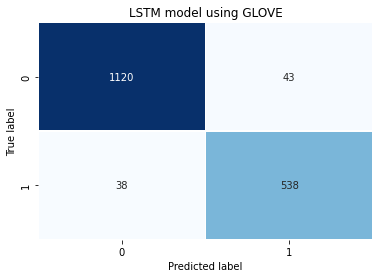

In [32]:
# Evaluation of LSTM model on TEST dataset using Glove pre-trained Word embeddings

y_pred_LSTM_glove = (model1.predict(padded_test_glove) > 0.5).astype("int32")
print("LSTM model accuracy: ", accuracy_score(y_test, y_pred_LSTM_glove))
print('\n', classification_report(y_test, y_pred_LSTM_glove))
plot_confusion_matrix(y_test, y_pred_LSTM_glove, 'LSTM model using GLOVE')

## Word2vec pre-trained word embeddings:

In [50]:
# /content/Spam Email raw text for NLP.csv
dataset_2 = pd.read_csv('/content/Spam Email raw text for NLP.csv')

In [51]:
import gensim

dataset_2['MESSAGE'] = dataset_2['MESSAGE'].apply(lambda x : x.lower())
dataset_2['MESSAGE'] = dataset_2['MESSAGE'].apply((lambda x : re.sub('[^a-zA-z0-9\s]', '' , x)))
dataset_2['MESSAGE'] = dataset_2['MESSAGE'].replace(r'\s+|\\n', ' ', regex=True)
dataset_2['TEXT_CLEAN'] = dataset_2['MESSAGE'].apply(lambda x: gensim.utils.simple_preprocess(x))
dataset_2.head()

,CATEGORY,MESSAGE,FILE_NAME,TEXT_CLEAN
0,1,dear homeowner interest rates are at their low...,00249.5f45607c1bffe89f60ba1ec9f878039a,"[dear, homeowner, interest, rates, are, at, th..."
1,1,attention this is a must for all computer user...,00373.ebe8670ac56b04125c25100a36ab0510,"[attention, this, is, must, for, all, computer..."
2,1,this is a multipart message in mime format _ne...,00214.1367039e50dc6b7adb0f2aa8aba83216,"[this, is, multipart, message, in, mime, forma..."
3,1,important information the new domain names are...,00210.050ffd105bd4e006771ee63cabc59978,"[important, information, the, new, domain, nam..."
4,1,this is the bottom line if you can give away c...,00033.9babb58d9298daa2963d4f514193d7d6,"[this, is, the, bottom, line, if, you, can, gi..."


In [52]:
dataset_2.sample(frac=1)

,CATEGORY,MESSAGE,FILE_NAME,TEXT_CLEAN
975,1,cest un message de format mime en plusieurs pa...,00200.2fcabc2b58baa0ebc051e3ea3dfafd8f,"[cest, un, message, de, format, mime, en, plus..."
247,1,html head head center h1 bfont facearial black...,00405.3163fff27ff95b91afd656f0025c6a83,"[html, head, head, center, bfont, facearial, b..."
698,1,this is a multipart message in mime format _ne...,01269.aa905c10b8358328fb77d2f900e4491f,"[this, is, multipart, message, in, mime, forma..."
2882,0,you around c i dont take no stocks in mathemat...,00675.2b3aefd8378ddbd20396c4b9d961a0bd,"[you, around, dont, take, no, stocks, in, math..."
5734,0,gary lawrence murphy wrote any idea of the dat...,00779.447369a2496e46d8e73dec75a8e3885c,"[gary, lawrence, murphy, wrote, any, idea, of,..."
...,...,...,...,...
1944,0,url httpwwwaaronswcomweblog000614 date 2002092...,01863.bd70d6cfad21b043c84dab8e1e86e2be,"[url, date, need, lawyer, willing, to, argue, ..."
2936,0,i am trying to rebuild the recently posted als...,00069.1477f740f56d3e0bd132ad70993edda5,"[am, trying, to, rebuild, the, recently, poste..."
1257,1,if you havent already read the 1 ny times best...,00791.68d57323ce71a6f706248a709363e9a8,"[if, you, havent, already, read, the, ny, time..."
5355,0,quoting wintermute couteircomnet no as of oh a...,00356.b9181a622935ef7869af85616a8cceab,"[quoting, wintermute, couteircomnet, no, as, o..."


In [53]:
X_train, X_test, y_train, y_test = train_test_split (dataset_2['MESSAGE'], dataset_2['CATEGORY'] , test_size=0.3)

In [54]:
print(type(X_train))
X_train[0:3]

<class 'pandas.core.series.Series'>


2449    on mon 20021007 at 1154 matthias saou wrote on...
4110    hi im trying to build sa under digital unix 40...
1932     on mon 9 sep 2002 rick baartman wrote thanks ...
Name: MESSAGE, dtype: object

In [55]:
from gensim.utils import simple_preprocess
X_train_clean = [simple_preprocess(x) for x in X_train]
type(X_train_clean)
print(X_train_clean[0:3])

[['on', 'mon', 'at', 'matthias', 'saou', 'wrote', 'once', 'upon', 'time', 'alvie', 'wrote', 'this', 'is', 'only', 'the', 'last', 'part', 'of', 'iti', 'used', 'rpmbuild', 'rebuild', 'without', 'avifile', 'transcode', 'fr', 'srcrpm', 'af', 'waveformatex', 'is', 'used', 'as', 'type', 'but', 'is', 'not', 'defined', 'as', 'type', 'af', 'parse', 'error', 'before', 'if', 'all', 'of', 'these', 'af', 'are', 'related', 'to', 'avifile', 'support', 'normally', 'my', 'fr', 'build', 'of', 'transcode', 'defaults', 'to', 'not', 'use', 'avifile', 'but', 'you', 'can', 'use', 'with', 'avifile', 'to', 'force', 'recompiling', 'against', 'it', 'do', 'you', 'have', 'an', 'old', 'avifile', 'installed', 'maybe', 'can', 'you', 'check', 'the', 'configure', 'line', 'run', 'at', 'the', 'beginning', 'of', 'the', 'rebuild', 'process', 'to', 'see', 'if', 'it', 'does', 'include', 'the', 'withoutavifile', 'option', 'yes', 'it', 'was', 'there', 'you', 'guessed', 'the', 'problem', 'correctly', 'in', 'an', 'earlier', 'ema

In [56]:
# Train the word2vec model
import gensim
w2v_model = gensim.models.Word2Vec(X_train_clean, size=100, window=5, min_count=2)                                                                    
                                   

In [57]:
pre_trained_weights = w2v_model.wv.vectors
vocab_size, embedding_size = pre_trained_weights.shape 

pre_trained_weights.shape

(35751, 100)

In [58]:
w2v_model.wv['you'].shape

(100,)

In [59]:
print(X_train[0:5])

2449    on mon 20021007 at 1154 matthias saou wrote on...
4110    hi im trying to build sa under digital unix 40...
1932     on mon 9 sep 2002 rick baartman wrote thanks ...
2869    _exmh_592622610p contenttype textplain charset...
1391    html head titletitle head body link333399 font...
Name: MESSAGE, dtype: object


In [60]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_len = 1000
vocab_size = 10000

tokenizer_2 = Tokenizer(num_words=vocab_size, split=' ')
tokenizer_2.fit_on_texts(X_train)

encoded_train_w2v = tokenizer_2.texts_to_sequences(X_train)
encoded_test_w2v = tokenizer_2.texts_to_sequences(X_test)
padded_train_w2v = pad_sequences(encoded_train_w2v, maxlen = max_len)
padded_test_w2v = pad_sequences(encoded_test_w2v, maxlen=max_len)

In [61]:
print('Vocab size from tokenizer: ', len(tokenizer_2.word_index))

Vocab size from tokenizer:  92710


In [64]:
## Create "embedding_matrix" to index our vocabulary using the Word2vec model

vocab_size_2 = len(tokenizer_2.word_index)+1

num_tokens_2 = vocab_size_2 
embedding_dim_2 = 100   ## 100 dimensions
hits_2 = 0    ## number of words that were found in the pretrained model
misses_2 = 0    ## number of words that were missing in the pretrained model

# Prepare embedding matrix for our word list
embedding_matrix_2 = np.zeros((num_tokens_2, embedding_dim_2))
for word, i in tokenizer_2.word_index.items():
    if word in w2v_model.wv:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix_2[i] = w2v_model.wv[word]
        hits_2 += 1
    else:
        misses_2 += 1
print("Converted %d words (%d misses)" % (hits_2, misses_2))

Converted 27335 words (65375 misses)


In [65]:
## Define our embedding layer for the training model 
## We load our embedding_matrix as the initializer and set trainable to False to avoid retraining this layer

from keras.layers import Embedding
from keras.initializers import Constant
from keras.models import Sequential
from keras.layers import Dense, Embedding , LSTM, SpatialDropout1D, SimpleRNN, GRU

embedding_layer_2 = Embedding(num_tokens_2, embedding_dim_2,
                            embeddings_initializer= Constant(embedding_matrix_2), 
                            input_length=1000, trainable=False)

In [66]:
## LSTM Model with Word2vec pre-trained embeddings

model2 = Sequential()
model2.add(embedding_layer_2)
model2.add(LSTM(64))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ["accuracy"])
LSTM_word2vec_model = model2.fit(padded_train_w2v, y_train, epochs = 3)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1000, 100)         9271100   
                                                                 
 lstm_4 (LSTM)               (None, 64)                42240     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,313,405
Trainable params: 42,305
Non-trainable params: 9,271,100
_________________________________________________________________
Epoch 1/3
127/127 [==============================] - 59s 452ms/step - loss: 0.1906 - accuracy: 0.9307
Epoch 2/3
127/127 [==============================] - 56s 443ms/step - loss: 0.0822 - accuracy: 0.9739
Epoch 3/3
127/127 [==============================] - 57s 446ms/step - loss: 0.0628 - accuracy: 0.98

LSTM model accuracy:  0.9769982748706153

               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1145
           1       0.96      0.98      0.97       594

    accuracy                           0.98      1739
   macro avg       0.97      0.98      0.97      1739
weighted avg       0.98      0.98      0.98      1739



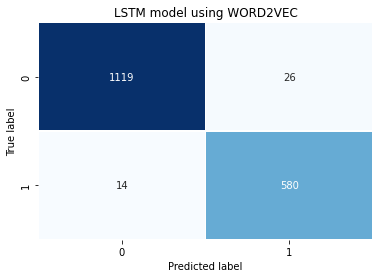

In [67]:
# Evaluation of LSTM model on TEST dataset using Word2vec pre-trained Word embeddings

y_pred_LSTM_w2v = (model2.predict(padded_test_w2v) > 0.5).astype("int32")
print("LSTM model accuracy: ", accuracy_score(y_test, y_pred_LSTM_w2v))
print('\n', classification_report(y_test, y_pred_LSTM_w2v))
plot_confusion_matrix(y_test, y_pred_LSTM_w2v, 'LSTM model using WORD2VEC')